<a href="https://colab.research.google.com/github/zmirzaei/tensorflow/blob/main/AutoencoderMyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
from glob import glob as gg
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [4]:
!cp drive/My\ Drive/Mirzaei_Shinetech_Shared_Folder/5_world.rar .
!mkdir dataset
!unrar x 5_world.rar dataset/


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from 5_world.rar

Creating    dataset/5_world                                           OK
Creating    dataset/5_world/ABAN                                      OK
Extracting  dataset/5_world/ABAN/ID0000100_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000101_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000102_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000103_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000104_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000105_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000106_p6_B8.tif                       0%  OK 
Extracting  dataset/5_world/ABAN/ID0000107_p6_B8.tif                       0%  OK 
Extracting  dataset/

In [5]:
import os
total_image = []
total_label =[]
path = 'dataset/5_world'
classes = os.listdir(path)
print(classes)

['ABAN', 'DEI', 'BANK', 'EIGHT', 'ONE']


In [111]:

import random
path = 'dataset/5_world'
clasess=os.listdir(path)
total_image = []
total_label =[]
for cls in clasess:
  images = gg(os.path.join(path,cls + '/*'))
  for img in images:
    if img.split('/')[-1] != "Thumbs.db" and cv2.imread(img) is not None:
       total_image.append(cv2.resize(cv2.imread(img),(100,100)))
       total_label.append(cls)

In [112]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = np.array(label_encoder.fit_transform(total_label))

In [113]:
from sklearn.model_selection import train_test_split

In [139]:
x_train, x_test, y_train, y_test = train_test_split(total_image,label, test_size=0.1,random_state=42)
print(len(x_train)) 
print(len(y_train))

2248
2248


In [140]:
x_train=np.array(x_train)
x_test=np.array(x_test)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [141]:
print (x_train.shape)
print (x_test.shape)

(2248, 100, 100, 3)
(250, 100, 100, 3)


In [162]:
latent_dim = 5 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(5, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(30000, activation='sigmoid'),
      layers.Reshape((100,100,3))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
autoencoder = Autoencoder(latent_dim)

In [164]:
autoencoder.compile(optimizer='adam', loss=loss_fn)

In [163]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [168]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
71/71 [==============================] - 2s 22ms/step - loss: 0.2000 - val_loss: 0.1932
Epoch 2/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1857 - val_loss: 0.1791
Epoch 3/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1720 - val_loss: 0.1658
Epoch 4/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1591 - val_loss: 0.1533
Epoch 5/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1471 - val_loss: 0.1418
Epoch 6/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1360 - val_loss: 0.1310
Epoch 7/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1256 - val_loss: 0.1211
Epoch 8/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1161 - val_loss: 0.1119
Epoch 9/10
71/71 [==============================] - 1s 20ms/step - loss: 0.1073 - val_loss: 0.1035
Epoch 10/10
71/71 [==============================] - 1s 20ms/step - loss: 0.0992 - val_loss: 0.0957


In [166]:
autoencoder.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
               metrics=['accuracy'])

In [167]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [160]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [169]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

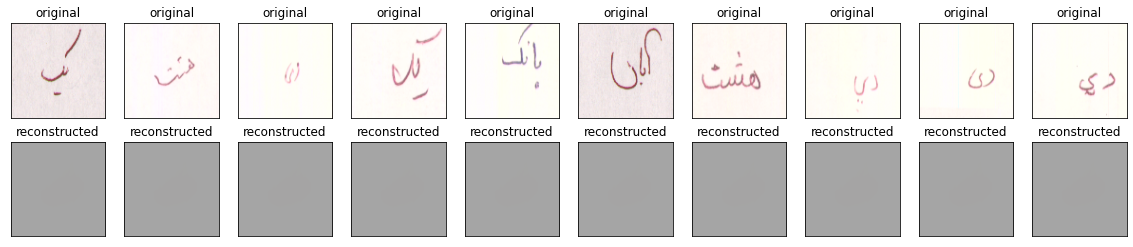

In [170]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [171]:
noisy_train=decoded_imgs

In [172]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(100,100, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3, 3), activation='relu', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [173]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [174]:
autoencoder.fit(decoded_imgs, decoded_imgs,
                epochs=10,
                shuffle=True,
                validation_data=(decoded_imgs, decoded_imgs))

Epoch 1/10
8/8 [==============================] - 4s 523ms/step - loss: 0.3329 - val_loss: 0.2476
Epoch 2/10
8/8 [==============================] - 4s 511ms/step - loss: 0.1873 - val_loss: 0.1397
Epoch 3/10
8/8 [==============================] - 4s 506ms/step - loss: 0.1106 - val_loss: 0.0682
Epoch 4/10
8/8 [==============================] - 4s 502ms/step - loss: 0.0516 - val_loss: 0.0318
Epoch 5/10
8/8 [==============================] - 4s 506ms/step - loss: 0.0231 - val_loss: 0.0163
Epoch 6/10
8/8 [==============================] - 4s 506ms/step - loss: 0.0130 - val_loss: 0.0104
Epoch 7/10
8/8 [==============================] - 4s 507ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 8/10
8/8 [==============================] - 4s 507ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 9/10
8/8 [==============================] - 4s 506ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 10/10
8/8 [==============================] - 4s 509ms/step - loss: 0.0048 - val_loss: 0.0044


In [175]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

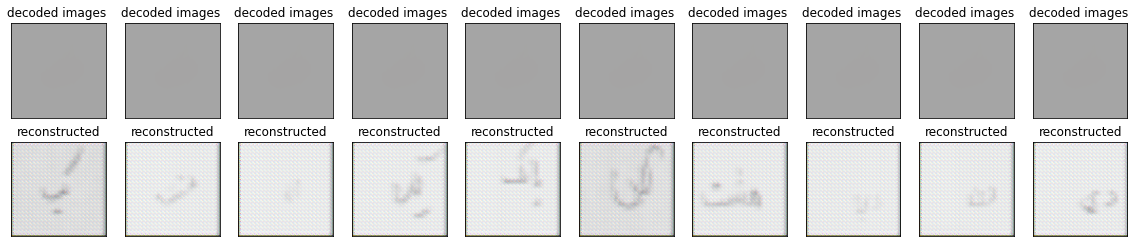

In [180]:

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("decoded images ")
    plt.imshow(tf.squeeze(noisy_train[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [179]:
autoencoder.fit(decoded_imgs, decoded_imgs,
                epochs=10,
                shuffle=True,
                validation_data=(decoded_imgs, decoded_imgs))

Epoch 1/10
8/8 [==============================] - 4s 498ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 2/10
8/8 [==============================] - 4s 506ms/step - loss: 0.0011 - val_loss: 8.4247e-04
Epoch 3/10
8/8 [==============================] - 4s 508ms/step - loss: 7.8877e-04 - val_loss: 7.2152e-04
Epoch 4/10
8/8 [==============================] - 4s 511ms/step - loss: 6.4069e-04 - val_loss: 5.6035e-04
Epoch 5/10
8/8 [==============================] - 4s 504ms/step - loss: 5.4880e-04 - val_loss: 5.1515e-04
Epoch 6/10
8/8 [==============================] - 4s 504ms/step - loss: 4.8269e-04 - val_loss: 4.5487e-04
Epoch 7/10
8/8 [==============================] - 4s 503ms/step - loss: 4.4253e-04 - val_loss: 4.2360e-04
Epoch 8/10
8/8 [==============================] - 4s 509ms/step - loss: 4.1851e-04 - val_loss: 4.0608e-04
Epoch 9/10
8/8 [==============================] - 4s 505ms/step - loss: 3.9685e-04 - val_loss: 3.8743e-04
Epoch 10/10
8/8 [==============================] - 4s 497m